In [52]:
library(karyoploteR)

In [53]:
library(tidyverse)

In [54]:
library(ggplot2)

### customize genome with CHM13

In [55]:
custom.genome <- toGRanges("/disk1/pengweixing/database/hg38/hg38.fa.fai3")

### load the cnv

In [56]:
high <- read.table('high')

In [57]:
low <- read.table('low')

In [58]:
neg <- read.table('neg')

In [59]:
colnames(high) <-c("chr","start","end","cn","type","sample")
colnames(low) <-c("chr","start","end","cn","type","sample")
colnames(neg) <-c("chr","start","end","cn","type","sample")

In [60]:
plot_params <- list(leftmargin = 0.1, rightmargin = 0.05, 
            topmargin = 120, bottommargin = 100, ideogramheight = 50, 
            ideogramlateralmargin = 0, data1height = 400, data1inmargin = 10, 
            data1outmargin = 20, data1min = 0, data1max = 1, 
            data2height = 0, data2inmargin = 0, data2outmargin = 0, 
            data2min = 0, data2max = 1)

In [61]:
unique_high <- unique(high$sample)

In [62]:
unique_low <- unique(low$sample)

In [63]:
unique_neg <- unique(neg$sample)

In [64]:
markers <- data.frame(chr="chr13",pos=32357576, labels="BRCA2")

In [68]:
pdf(file = "Chr13.low.amp.pdf",width = 6,height = 5)
kp <- plotKaryotype(chromosomes = "chr13",zoom =toGRanges(data.frame("chr13", 31e6, 34e6)) ,
                    genome = "hg38",plot.params=plot_params)
kpAddBaseNumbers(kp,tick.dist = 500000)

markers <- data.frame(chr="chr13",pos=32357576, labels="BRCA2")
kpPlotMarkers(kp, chr=markers$chr, x=markers$pos, labels=markers$labels,y = 0.8)

kpPlotRegions(kp, data=toGRanges(c("chr13:32313480-32401672")), r0=0, r1=0.03, col = "blue", border=NA, lwd=3)

temp_r1 = 0.03
for(i in unique_low){
    low %>% filter(sample==i) ->temp
    regs <- GenomicRanges::reduce(toGRanges(temp))
    kpPlotRegions(kp, data=regs, r0=temp_r1+0.015, r1=temp_r1+0.045, col = "red", border=NA, lwd=0)
    temp_r1  = temp_r1+ 0.045

}
dev.off()

png 
  2

In [66]:
pdf(file = "chr13.high.amp.pdf",width = 6,height = 5)
kp <- plotKaryotype(chromosomes = "chr13",zoom =toGRanges(data.frame("chr13", 31e6, 34e6)) ,
                    genome = "hg38",plot.params=plot_params)
kpAddBaseNumbers(kp,tick.dist = 500000)

kpPlotMarkers(kp, chr=markers$chr, x=markers$pos, labels=markers$labels,y = 0.8)

kpPlotRegions(kp, data=toGRanges(c("chr13:32313480-32401672")), r0=0, r1=0.03, col = "blue", border=NA, lwd=3)

temp_r1 = 0.03
for(i in unique_high){
    high %>% filter(sample==i) ->temp
    regs <- GenomicRanges::reduce(toGRanges(temp))
    kpPlotRegions(kp, data=regs, r0=temp_r1+0.015, r1=temp_r1+0.045, col = "red", border=NA, lwd=0)
    temp_r1  = temp_r1+ 0.045

}
dev.off()

png 
  2

In [67]:
pdf(file = "Chr13.neg.amp.pdf",width = 6,height = 5)
kp <- plotKaryotype(chromosomes = "chr13",zoom =toGRanges(data.frame("chr13", 31e6, 34e6)) ,
                    genome = "hg38",plot.params=plot_params)
kpAddBaseNumbers(kp,tick.dist = 500000)

kpPlotMarkers(kp, chr=markers$chr, x=markers$pos, labels=markers$labels,y = 0.8)

kpPlotRegions(kp, data=toGRanges(c("chr13:32313480-32401672")), r0=0, r1=0.03, col = "blue", border=NA, lwd=3)

temp_r1 = 0.03
for(i in unique_neg){
    neg %>% filter(sample==i) ->temp
    regs <- GenomicRanges::reduce(toGRanges(temp))
    kpPlotRegions(kp, data=regs, r0=temp_r1+0.015, r1=temp_r1+0.045, col = "red", border=NA, lwd=0)
    temp_r1  = temp_r1+ 0.045

}
dev.off()

png 
  2

In [35]:
high$sample %>% unique() %>% length()

[1] 14

In [36]:
low$sample %>% unique() %>% length()

[1] 6

In [37]:
neg$sample %>% unique() %>% length()

[1] 3

In [69]:
aa <- data.frame(amp=c(13,9,2,2),un=c(113-13,42-9,45-2,26-2))

In [70]:
rownames(aa) <- c("All","High","Low","Neg")
aa$name = rownames(aa)
aa %>% mutate(amp_per = amp/(amp+un),un_per=un/(amp+un)) -> aa2

In [71]:
aa2[,3:5] %>% pivot_longer(!name, names_to = "type", values_to = "percentage") -> aa3

In [72]:
aa3$type = factor(aa3$type,levels=c("un_per","amp_per"))

In [73]:
openxlsx::write.xlsx(x=aa2,rowNames = FALSE,file = "Chr13.bar.xlsx")

In [74]:
p <- ggplot(data=aa3, aes(x=name, y=percentage, fill=type)) + geom_bar(stat="identity")+
    scale_fill_manual(values=c("#61B7CF","#025167"))+theme_bw() + theme(axis.text = element_text(color="black",size=15))+
    xlab("")+geom_text(aes(label = scales::percent(percentage)),color="white",position=position_fill(vjust =0.5),size = 4)

In [75]:
ggsave(filename = "Chr13.bar.pdf",plot = p,width = 5,height = 4)

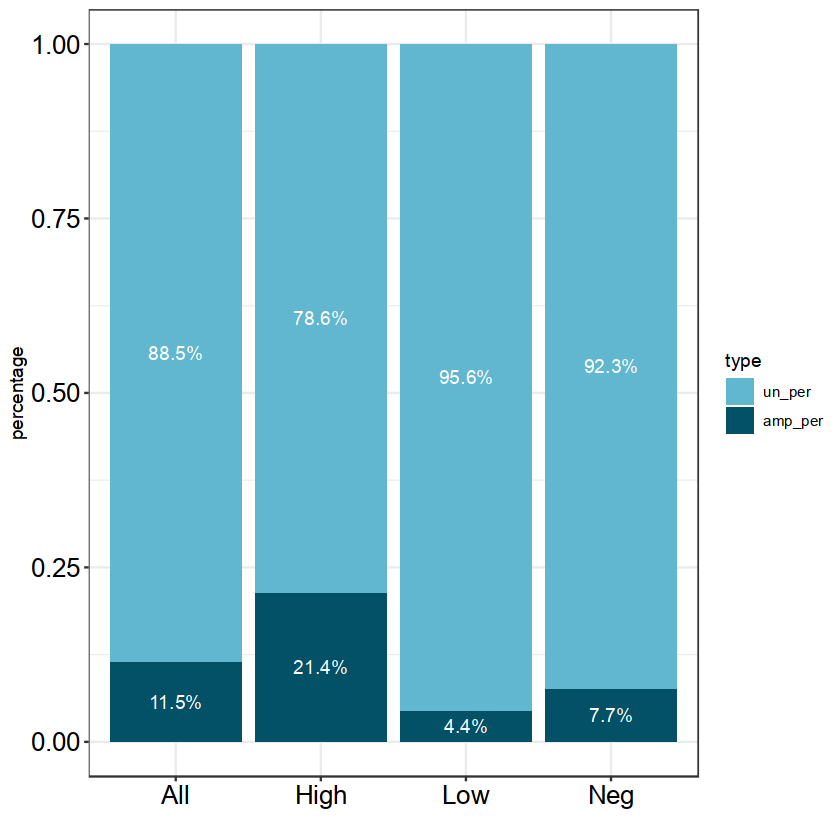

In [76]:
p